<a href="https://colab.research.google.com/github/laksheenmendis/Coursera-TensorFlow/blob/master/Multi_class_classifier_Sign_language_MNIST_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [0]:
# Data for this could be downloaded from https://www.kaggle.com/datamunge/sign-language-mnist

def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        readCSV = csv.reader(training_file, delimiter=',' )
        i=0
        img=[]
        lab=[]
        for row in readCSV:
            if(i==0):
                i = i + 1
            else:
                lab.append(row[0])
                img_data=row[1:785]
                img_data2 = np.array_split(img_data, 28)
                img.append(img_data2)
        
    images = np.array(img).astype('float')
    labels = np.array(lab).astype('float')
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [0]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
        rescale=1/255,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        shear_range=0.2,
        rotation_range=40,
        horizontal_flip=True,
        fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
        rescale=1/255,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        shear_range=0.2,
        rotation_range=40,
        horizontal_flip=True,
        fill_mode='nearest'
)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [0]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),input_shape=(28,28,1),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(500,activation='relu'),
        tf.keras.layers.Dense(26,activation='softmax')
])

training_generator = train_datagen.flow(training_images, training_labels, batch_size=32)
validation_generator = validation_datagen.flow(testing_images, testing_labels, batch_size=32)
    
# Compile Model. 
model.compile(optimizer='rmsprop', metrics=['accuracy'],
              loss = 'sparse_categorical_crossentropy')

# Train the Model
history = model.fit_generator(training_generator, epochs = 10, validation_data=validation_generator)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/10
858/858 [==============================] - 112s 130ms/step - loss: 2.6589 - accuracy: 0.1938 - val_loss: 2.2652 - val_accuracy: 0.2893
Epoch 2/10
858/858 [==============================] - 108s 126ms/step - loss: 1.9598 - accuracy: 0.3853 - val_loss: 1.9728 - val_accuracy: 0.3606
Epoch 3/10
858/858 [==============================] - 108s 125ms/step - loss: 1.5404 - accuracy: 0.5033 - val_loss: 1.4040 - val_accuracy: 0.5282
Epoch 4/10
858/858 [==============================] - 109s 127ms/step - loss: 1.2657 - accuracy: 0.5889 - val_loss: 1.2072 - val_accuracy: 0.5954
Epoch 5/10
858/858 [==============================] - 109s 128ms/step - loss: 1.0673 - accuracy: 0.6519 - val_loss: 1.0355 - val_accuracy: 0.6511
Epoch 6/10
858/858 [==============================] - 109s 127ms/step - loss: 0.9172 - accuracy: 0.7030 - val_loss: 1.0967 - val_accuracy: 0.6340
Epoch 7/10
858/858 [==============================] - 108s 126ms/step - loss: 0.8135 - accuracy: 0.7319 - val_loss: 0.9157 -

[157.28364686386186, 0.71737313]

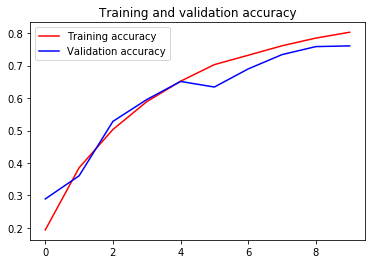

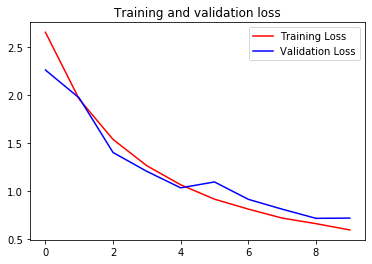

In [0]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [0]:
# // %%javascript
# // <!-- Save the notebook -->
# // IPython.notebook.save_checkpoint();

In [0]:
# // %%javascript
# // IPython.notebook.session.delete();
# // window.onbeforeunload = null
# // setTimeout(function() { window.close(); }, 1000);